# Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [16]:
df = pd.read_csv("D:\\covid19.csv")

In [17]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


# Calculating the total infected per a day 

In [18]:
total_infected = []
dates1 = 0
for dates in df.Date:
    if dates != dates1:
        sum = 0
        for i in range(len(df.Date)):
            if df.Date[i] == dates:
                sum = sum + df.ConfirmedIndianNational[i] + df.ConfirmedForeignNational[i] + df.Cured[i] + df.Deaths[i]
    else:
        continue
    total_infected.append(sum)
    dates1 = dates
            

In [19]:
len(total_infected)

52

# Storing Dates in one array

In [20]:
dates_in_df=[]
dates1 = 0
for dates in df.Date:
    if dates != dates1:
        dates_in_df.append(dates)
        dates1 = dates
    else:
        continue
    

In [21]:
len(dates_in_df)

52

In [22]:
df_new = (pd.DataFrame(dates_in_df))

In [23]:
df_new["Dates"] = dates_in_df

In [24]:
df_new["Total_infected"] = total_infected


In [25]:
df_new.drop(columns = [0],inplace = True)
df_new.shape

(52, 2)

# Printing the result in dates vs Total Infected format

In [26]:
df_new

,Dates,Total_infected
0,30-01-2020,1
1,31-01-2020,1
2,01-02-2020,2
3,02-02-2020,3
4,03-02-2020,3
5,04-02-2020,3
6,05-02-2020,3
7,06-02-2020,3
8,07-02-2020,3
9,08-02-2020,3


# Plotting the results in date vs total_infected

Text(0.5, 0, 'dates')

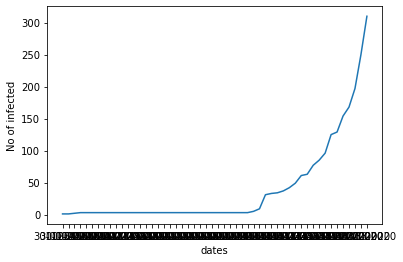

In [27]:
plt.plot(df_new.Dates,df_new.Total_infected )
plt.ylabel("No of infected")
plt.xlabel("dates")

# Removing dates before 04-3-2020 using outlier removal concept

In [28]:
df_new[df_new.Total_infected<30].head()

,Dates,Total_infected
0,30-01-2020,1
1,31-01-2020,1
2,01-02-2020,2
3,02-02-2020,3
4,03-02-2020,3


In [29]:
df_new_1 = (df_new[(df_new.Total_infected < 30)].index.values)

In [30]:
df_new_1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [31]:
df_new_2 = pd.DataFrame()
df_new_2 = df_new.drop(df_new_1,axis = "index")

# Setting dates as the index in the new data frame

In [32]:
df_new_2.set_index("Dates",inplace = True)

In [33]:
df_new_2

,Total_infected
Dates,
04-03-2020,31
05-03-2020,33
06-03-2020,34
07-03-2020,37
08-03-2020,42
09-03-2020,49
10-03-2020,61
11-03-2020,63
12-03-2020,77


# Calculating value of r 

In [34]:
sum_r = 0
for i in range(len(df_new_2.Total_infected) - 1):
    r_intermediate = (df_new_2.Total_infected[i+1] - df_new_2.Total_infected[i])/df_new_2.Total_infected[i]
    sum_r += r_intermediate
sum_r
r_final = sum_r/(len(df_new_2.Total_infected) - 1)

In [35]:
r_final

0.14814803793984233

# Final Result

In [36]:
P_t = 31*(2.718282**(26*r_final))
P_t

1459.4813823035029